1. Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need

In [10]:
import pandas as pd
import matplotlib.pyplot as plt  # import library
import numpy as np
import os
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns
from sklearn.model_selection import train_test_split

df_bottle = pd.read_csv("bottle.csv", usecols = ['Cst_Cnt','Btl_Cnt','Sta_ID','Depth_ID','Depthm','T_degC','Salnty','STheta','RecInd','T_prec','S_prec','O_qual','O2Satq','PO4q','SiO3qu','NO2q','NO3q','R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA','R_SVA', 'R_DYNHT','R_PRES'])
# it was very difficult to load this data,so I choose the columns I needed.
df_bottle 


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,NO2q,NO3q,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,25.64900,3,1.0,...,9.0,9.0,0.0,10.50,10.50,33.440,25.640,233.0,0.000,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,25.65600,3,2.0,...,9.0,9.0,8.0,10.46,10.46,33.440,25.650,232.5,0.010,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,25.65400,7,2.0,...,9.0,9.0,10.0,10.46,10.46,33.437,25.650,232.8,0.020,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,25.64300,3,2.0,...,9.0,9.0,19.0,10.45,10.45,33.420,25.640,234.1,0.040,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,25.64300,7,2.0,...,9.0,9.0,20.0,10.45,10.45,33.421,25.640,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864858,34404,864859,093.4 026.4,20-1611SR-MX-310-2239-09340264-0000A-7,0,18.744,33.4083,23.87055,7,2.0,...,NaN,NaN,0.0,18.74,18.74,33.408,23.871,402.4,0.000,0
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,23.87072,3,2.0,...,NaN,NaN,2.0,18.74,18.74,33.408,23.871,402.5,0.008,2
864860,34404,864861,093.4 026.4,20-1611SR-MX-310-2239-09340264-0005A-3,5,18.692,33.4150,23.88911,3,2.0,...,NaN,NaN,5.0,18.69,18.69,33.415,23.889,400.8,0.020,5
864861,34404,864862,093.4 026.4,20-1611SR-MX-310-2239-09340264-0010A-3,10,18.161,33.4062,24.01426,3,2.0,...,NaN,NaN,10.0,18.16,18.16,33.406,24.014,389.1,0.040,10


In [11]:
df_bottle.info() # this method shows us how many columns and rows data has and how many of these is non nulll and also it shows us type of columns.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Cst_Cnt     864863 non-null  int64  
 1   Btl_Cnt     864863 non-null  int64  
 2   Sta_ID      864863 non-null  object 
 3   Depth_ID    864863 non-null  object 
 4   Depthm      864863 non-null  int64  
 5   T_degC      853900 non-null  float64
 6   Salnty      817509 non-null  float64
 7   STheta      812174 non-null  float64
 8   RecInd      864863 non-null  int64  
 9   T_prec      853900 non-null  float64
 10  S_prec      817509 non-null  float64
 11  O_qual      184676 non-null  float64
 12  O2Satq      217797 non-null  float64
 13  PO4q        451786 non-null  float64
 14  SiO3qu      510866 non-null  float64
 15  NO2q        529474 non-null  float64
 16  NO3q        529933 non-null  float64
 17  R_Depth     864863 non-null  float64
 18  R_TEMP      853900 non-null  float64
 19  R_

In [12]:
df_bottle.isna().sum() # this method shows us how many columns have raw NAN values. 
# and I decided drop all because data has 864863 rows so NAN rows are max 335389 so it is less then half.

Cst_Cnt            0
Btl_Cnt            0
Sta_ID             0
Depth_ID           0
Depthm             0
T_degC         10963
Salnty         47354
STheta         52689
RecInd             0
T_prec         10963
S_prec         47354
O_qual        680187
O2Satq        647066
PO4q          413077
SiO3qu        353997
NO2q          335389
NO3q          334930
R_Depth            0
R_TEMP         10963
R_POTEMP       46047
R_SALINITY     47354
R_SIGMA        52856
R_SVA          52771
R_DYNHT        46657
R_PRES             0
dtype: int64

In [13]:
df_bottle = df_bottle.dropna()
df_bottle # dropping NA values

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,...,NO2q,NO3q,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.500,33.4400,25.64900,3,1.0,...,9.0,9.0,0.0,10.50,10.50,33.440,25.640,233.0,0.000,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.460,33.4400,25.65600,3,2.0,...,9.0,9.0,8.0,10.46,10.46,33.440,25.650,232.5,0.010,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.460,33.4370,25.65400,7,2.0,...,9.0,9.0,10.0,10.46,10.46,33.437,25.650,232.8,0.020,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.450,33.4200,25.64300,3,2.0,...,9.0,9.0,19.0,10.45,10.45,33.420,25.640,234.1,0.040,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.450,33.4210,25.64300,7,2.0,...,9.0,9.0,20.0,10.45,10.45,33.421,25.640,234.0,0.040,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864622,34396,864623,093.3 055.0,20-1611SR-MX-312-0455-09330550-0170A-5,170,9.219,33.8040,26.15299,5,2.0,...,9.0,9.0,170.0,9.22,9.20,33.804,26.153,188.9,0.532,171
864624,34396,864625,093.3 055.0,20-1611SR-MX-312-0455-09330550-0201A-5,201,8.791,33.9538,26.33881,5,2.0,...,9.0,9.0,201.0,8.79,8.77,33.954,26.339,171.8,0.588,203
864671,34398,864672,093.3 070.0,20-1611SR-PR-312-1629-09330700-0012B-6,12,17.959,33.3802,24.04390,6,2.0,...,9.0,9.0,12.0,17.96,17.96,33.380,24.044,386.3,0.047,12
864678,34398,864679,093.3 070.0,20-1611SR-PR-312-1629-09330700-0040B-6,40,16.492,33.3042,24.33510,6,2.0,...,9.0,9.0,40.0,16.49,16.49,33.304,24.335,359.5,0.154,40


In [14]:
df_bottle.isna().sum()

Cst_Cnt       0
Btl_Cnt       0
Sta_ID        0
Depth_ID      0
Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
O_qual        0
O2Satq        0
PO4q          0
SiO3qu        0
NO2q          0
NO3q          0
R_Depth       0
R_TEMP        0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

In [15]:
df_bottle.isnull().sum() # checking is there null


Cst_Cnt       0
Btl_Cnt       0
Sta_ID        0
Depth_ID      0
Depthm        0
T_degC        0
Salnty        0
STheta        0
RecInd        0
T_prec        0
S_prec        0
O_qual        0
O2Satq        0
PO4q          0
SiO3qu        0
NO2q          0
NO3q          0
R_Depth       0
R_TEMP        0
R_POTEMP      0
R_SALINITY    0
R_SIGMA       0
R_SVA         0
R_DYNHT       0
R_PRES        0
dtype: int64

In [16]:
print(df_bottle.dtypes) # checking type of columns.to make sure there is no incorrect type. And also I want to see how many object columns we have and I need convert them to numerical.

Cst_Cnt         int64
Btl_Cnt         int64
Sta_ID         object
Depth_ID       object
Depthm          int64
T_degC        float64
Salnty        float64
STheta        float64
RecInd          int64
T_prec        float64
S_prec        float64
O_qual        float64
O2Satq        float64
PO4q          float64
SiO3qu        float64
NO2q          float64
NO3q          float64
R_Depth       float64
R_TEMP        float64
R_POTEMP      float64
R_SALINITY    float64
R_SIGMA       float64
R_SVA         float64
R_DYNHT       float64
R_PRES          int64
dtype: object


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    # import all library we need
import os
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import seaborn as sns

df_cast = pd.read_csv("cast.csv",low_memory=False) # load data

df_cast



,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,NaN,34.0,16.0,1017.5,17.1,16.4,NaN,NaN,NaN,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,NaN,36.0,14.0,1019.6,18.0,16.2,NaN,NaN,NaN,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,15.0,35.0,16.0,1018.6,19.0,17.0,1.0,6.0,6.0,4.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,10.0,36.0,16.0,1016.3,19.5,17.1,1.0,3.0,7.0,5.0


In [8]:
df_cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34404 entries, 0 to 34403
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cst_Cnt      34404 non-null  int64  
 1   Cruise_ID    34404 non-null  object 
 2   Cruise       34404 non-null  int64  
 3   Cruz_Sta     34404 non-null  int64  
 4   DbSta_ID     34404 non-null  int64  
 5   Cast_ID      34404 non-null  object 
 6   Sta_ID       34404 non-null  object 
 7   Quarter      34404 non-null  int64  
 8   Sta_Code     34404 non-null  object 
 9   Distance     19714 non-null  float64
 10  Date         34404 non-null  object 
 11  Year         34404 non-null  int64  
 12  Month        34404 non-null  int64  
 13  Julian_Date  34404 non-null  int64  
 14  Julian_Day   34404 non-null  int64  
 15  Time         34080 non-null  object 
 16  Lat_Dec      34404 non-null  float64
 17  Lat_Deg      34404 non-null  int64  
 18  Lat_Min      34404 non-null  float64
 19  Lat_

In [9]:
# info() method show us how many columns have full value how many not,at least should be 60% values, therefore I decided drop this columns.
df_new_cast = df_cast.drop(["Secchi","ForelU","Order_Occ","Cruz_Leg","IntChl","IntC14","Inc_Str","Inc_End","PST_LAN","Civil_T","TimeZone","Wave_Dir","Wave_Prd","Cloud_Typ","Dry_T","Wet_T","Cloud_Typ","Cloud_Amt","Visibility","Wave_Ht"],axis=1)
df_new_cast # drop columns 
df_new_cast




,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Wea
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,31CR,HY,1.0,054 56,NaN,4903,23.0,18.0,NaN,2.0
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,31CR,HY,2.0,052 75,NaN,4903,16.0,5.0,NaN,4.0
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,31CR,HY,3.0,051 85,NaN,4903,23.0,5.0,NaN,6.0
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,31CR,HY,4.0,050 95,NaN,4903,18.0,8.0,NaN,2.0
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,31CR,HY,5.0,050 104,NaN,4903,27.0,13.0,NaN,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34399,34400,2016-11-06-C-33SR,201611,20161109330900,9330900,20-1611SR-MX-313-03:14-09330900,093.3 090.0,4,ST,-254.345,...,33SR,MX,168.0,93.3 90.0,3101,1611,34.0,16.0,1017.5,NaN
34400,34401,2016-11-06-C-33SR,201611,20161109331000,9331000,20-1611SR-MX-313-08:51-09331000,093.3 100.0,4,ST,-294.297,...,33SR,MX,177.0,93.3 100.0,3101,1611,36.0,14.0,1019.6,NaN
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,33SR,MX,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.6,1.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,33SR,MX,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.3,1.0


In [10]:
df_new_cast.isna().sum() # checking how many rows have NAN.

Cst_Cnt            0
Cruise_ID          0
Cruise             0
Cruz_Sta           0
DbSta_ID           0
Cast_ID            0
Sta_ID             0
Quarter            0
Sta_Code           0
Distance       14690
Date               0
Year               0
Month              0
Julian_Date        0
Julian_Day         0
Time             324
Lat_Dec            0
Lat_Deg            0
Lat_Min            0
Lat_Hem            0
Lon_Dec            0
Lon_Deg            0
Lon_Min            0
Lon_Hem            0
Rpt_Line           0
St_Line            0
Ac_Line            0
Rpt_Sta            0
St_Station         0
Ac_Sta             0
Bottom_D        2281
Ship_Name       1690
Ship_Code          0
Data_Type          0
Event_Num          3
Orig_Sta_ID        0
Data_Or        16129
Cruz_Num           0
Wind_Dir        1476
Wind_Spd        1679
Barometer      15341
Wea             7597
dtype: int64

In [11]:
df_new_cast= df_new_cast.dropna() # droping the na rows
df_new_cast

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Wea
15707,15708,1969-01-14-C-31JD,196901,19690106000520,6000520,19-6901JD-HY-025-0310-06000520,060.0 052.0,1,NST,-11.260,...,31JD,HY,2076.0,60 052,3101,6901,11.0,16.0,1004.4,2.0
15708,15709,1969-01-14-C-31JD,196901,19690106000600,6000600,19-6901JD-HY-025-0810-06000600,060.0 060.0,1,OCO,-44.060,...,31JD,HY,2077.0,60 060,3101,6901,18.0,16.0,1001.0,5.0
15709,15710,1969-01-14-C-31JD,196901,19690106000800,6000800,19-6901JD-HY-025-1849-06000800,060.0 080.0,1,OCO,-124.260,...,31JD,HY,2078.0,60 080,3101,6901,20.0,10.0,1000.3,2.0
15710,15711,1969-01-14-C-31JD,196901,19690106330520,6330520,19-6901JD-HY-024-2119-06330520,063.3 052.0,1,OCO,-9.670,...,31JD,HY,2079.0,63 052,3101,6901,15.0,9.0,1007.5,4.0
15711,15712,1969-01-14-C-31JD,196901,19690106330580,6330580,19-6901JD-HY-024-1654-06330580,063.3 058.0,1,NST,-36.080,...,31JD,HY,2080.0,63 058,3101,6901,21.0,10.0,1009.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34397,34398,2016-11-06-C-33SR,201611,20161109330700,9330700,20-1611SR-PR-312-16:29-09330700,093.3 070.0,4,ST,-174.549,...,33SR,PR,145.0,93.3 70.0,3101,1611,34.0,12.0,1018.0,1.0
34398,34399,2016-11-06-C-33SR,201611,20161109330800,9330800,20-1611SR-MX-312-21:35-09330800,093.3 080.0,4,ST,-214.544,...,33SR,MX,155.0,93.3 80.0,3101,1611,24.0,16.0,1016.9,2.0
34401,34402,2016-11-06-C-33SR,201611,20161109331100,9331100,20-1611SR-MX-313-14:48-09331100,093.3 110.0,4,ST,-334.157,...,33SR,MX,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.6,1.0
34402,34403,2016-11-06-C-33SR,201611,20161109331200,9331200,20-1611SR-MX-313-20:53-09331200,093.3 120.0,4,ST,-373.979,...,33SR,MX,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.3,1.0


In [12]:
df_new_cast.isnull().sum()

Cst_Cnt        0
Cruise_ID      0
Cruise         0
Cruz_Sta       0
DbSta_ID       0
Cast_ID        0
Sta_ID         0
Quarter        0
Sta_Code       0
Distance       0
Date           0
Year           0
Month          0
Julian_Date    0
Julian_Day     0
Time           0
Lat_Dec        0
Lat_Deg        0
Lat_Min        0
Lat_Hem        0
Lon_Dec        0
Lon_Deg        0
Lon_Min        0
Lon_Hem        0
Rpt_Line       0
St_Line        0
Ac_Line        0
Rpt_Sta        0
St_Station     0
Ac_Sta         0
Bottom_D       0
Ship_Name      0
Ship_Code      0
Data_Type      0
Event_Num      0
Orig_Sta_ID    0
Data_Or        0
Cruz_Num       0
Wind_Dir       0
Wind_Spd       0
Barometer      0
Wea            0
dtype: int64

In [13]:
df_new_cast.isna().sum()

Cst_Cnt        0
Cruise_ID      0
Cruise         0
Cruz_Sta       0
DbSta_ID       0
Cast_ID        0
Sta_ID         0
Quarter        0
Sta_Code       0
Distance       0
Date           0
Year           0
Month          0
Julian_Date    0
Julian_Day     0
Time           0
Lat_Dec        0
Lat_Deg        0
Lat_Min        0
Lat_Hem        0
Lon_Dec        0
Lon_Deg        0
Lon_Min        0
Lon_Hem        0
Rpt_Line       0
St_Line        0
Ac_Line        0
Rpt_Sta        0
St_Station     0
Ac_Sta         0
Bottom_D       0
Ship_Name      0
Ship_Code      0
Data_Type      0
Event_Num      0
Orig_Sta_ID    0
Data_Or        0
Cruz_Num       0
Wind_Dir       0
Wind_Spd       0
Barometer      0
Wea            0
dtype: int64

In [14]:
cat_columns = df_new_cast[["Cruise_ID","Cast_ID","Sta_ID","Sta_Code","Lat_Hem","Lon_Hem","Ship_Name","Ship_Code","Data_Type"]].columns
# select categorical columns  and convert to numerical columns.
df_new_cast[cat_columns] = df_new_cast[cat_columns].apply(lambda x: pd.factorize(x)[0])
df_new_cast

c:\users\12674\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Ship_Code,Data_Type,Event_Num,Orig_Sta_ID,Data_Or,Cruz_Num,Wind_Dir,Wind_Spd,Barometer,Wea
15707,15708,0,196901,19690106000520,6000520,0,0,1,0,-11.260,...,0,0,2076.0,60 052,3101,6901,11.0,16.0,1004.4,2.0
15708,15709,0,196901,19690106000600,6000600,1,1,1,1,-44.060,...,0,0,2077.0,60 060,3101,6901,18.0,16.0,1001.0,5.0
15709,15710,0,196901,19690106000800,6000800,2,2,1,1,-124.260,...,0,0,2078.0,60 080,3101,6901,20.0,10.0,1000.3,2.0
15710,15711,0,196901,19690106330520,6330520,3,3,1,1,-9.670,...,0,0,2079.0,63 052,3101,6901,15.0,9.0,1007.5,4.0
15711,15712,0,196901,19690106330580,6330580,4,4,1,0,-36.080,...,0,0,2080.0,63 058,3101,6901,21.0,10.0,1009.8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34397,34398,195,201611,20161109330700,9330700,7179,68,4,3,-174.549,...,15,3,145.0,93.3 70.0,3101,1611,34.0,12.0,1018.0,1.0
34398,34399,195,201611,20161109330800,9330800,7180,85,4,3,-214.544,...,15,4,155.0,93.3 80.0,3101,1611,24.0,16.0,1016.9,2.0
34401,34402,195,201611,20161109331100,9331100,7181,164,4,3,-334.157,...,15,4,186.0,93.3 110.0,3101,1611,35.0,16.0,1018.6,1.0
34402,34403,195,201611,20161109331200,9331200,7182,71,4,3,-373.979,...,15,4,212.0,93.3 120.0,3101,1611,36.0,16.0,1016.3,1.0


2. Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.

- -1 indicates a perfectly negative linear correlation.
- 0 indicates no linear correlation.
- 1 indicates a perfectly positive linear correlation.
The further away the correlation coefficient is from zero, the stronger the relationship between the two variables.

The correlation matrix shows us that the water temperature is strongly negatively correlated with the potential density of the water, and also strongly positively correlated with the declared temperature, the declared potential temperature and the declared specific volume Anomaly.
Potential Density of Water positively correlated with Depth in meters,Reported Depth in Meters,Reported Potential Density, Reported Dynamic Height and Pressure in decibars.

In [17]:
df_bottle.corr().round(4) # this code showing correlation to each other and we round values to make it clear.


,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,O_qual,...,NO2q,NO3q,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.0000,0.9988,0.0256,-0.0348,-0.0147,0.0251,0.0312,0.3901,0.0731,-0.2124,...,-0.0170,-0.0170,0.0256,-0.0348,-0.0351,-0.0147,0.0234,-0.0202,0.0193,0.0257
Btl_Cnt,0.9988,1.0000,0.0225,-0.0306,-0.0158,0.0234,0.0343,0.3726,0.0618,-0.2187,...,-0.0170,-0.0170,0.0225,-0.0306,-0.0309,-0.0158,0.0214,-0.0167,0.0163,0.0226
Depthm,0.0256,0.0225,1.0000,-0.7380,0.6227,0.4315,0.1080,-0.0057,0.0828,-0.0454,...,-0.0138,-0.0138,1.0000,-0.7380,-0.7401,0.6227,0.4804,-0.7397,0.9525,1.0000
T_degC,-0.0348,-0.0306,-0.7380,1.0000,-0.4882,-0.5508,-0.0911,-0.0744,-0.1037,0.0337,...,0.0088,0.0088,-0.7380,1.0000,0.9998,-0.4882,-0.6145,0.9606,-0.8079,-0.7372
Salnty,-0.0147,-0.0158,0.6227,-0.4882,1.0000,0.3976,0.0704,-0.0861,-0.0207,0.0155,...,-0.0062,-0.0062,0.6227,-0.4882,-0.4896,1.0000,0.4448,-0.6933,0.6877,0.6220
STheta,0.0251,0.0234,0.4315,-0.5508,0.3976,1.0000,0.0579,0.0163,0.0492,-0.0112,...,-0.0048,-0.0048,0.4315,-0.5508,-0.5651,0.3976,0.8984,-0.5867,0.4814,0.4310
RecInd,0.0312,0.0343,0.1080,-0.0911,0.0704,0.0579,1.0000,-0.0025,0.4669,-0.0867,...,0.0144,0.0144,0.1080,-0.0911,-0.0914,0.0704,0.0628,-0.0908,0.1142,0.1079
T_prec,0.3901,0.3726,-0.0057,-0.0744,-0.0861,0.0163,-0.0025,1.0000,0.3931,0.0276,...,0.0007,0.0007,-0.0057,-0.0744,-0.0741,-0.0861,0.0185,-0.0313,0.0018,-0.0057
S_prec,0.0731,0.0618,0.0828,-0.1037,-0.0207,0.0492,0.4669,0.3931,1.0000,-0.1155,...,-0.0119,-0.0119,0.0828,-0.1037,-0.1038,-0.0207,0.0523,-0.0726,0.0773,0.0829
O_qual,-0.2124,-0.2187,-0.0454,0.0337,0.0155,-0.0112,-0.0867,0.0276,-0.1155,1.0000,...,0.0379,0.0379,-0.0454,0.0337,0.0337,0.0154,-0.0128,0.0199,-0.0348,-0.0457


In [18]:
corr = df_bottle.corr()
corr.style.background_gradient(cmap='RdYlGn')

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,STheta,RecInd,T_prec,S_prec,O_qual,O2Satq,PO4q,SiO3qu,NO2q,NO3q,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.998795,0.025571,-0.034816,-0.014656,0.025102,0.031169,0.390085,0.073053,-0.212445,-0.210085,-0.017048,-0.017048,-0.017048,-0.017048,0.025599,-0.034812,-0.035097,-0.014654,0.023418,-0.020234,0.019346,0.025709
Btl_Cnt,0.998795,1.000000,0.022473,-0.030626,-0.015801,0.023430,0.034273,0.372555,0.061762,-0.218650,-0.216207,-0.016950,-0.016950,-0.016950,-0.016950,0.022502,-0.030622,-0.030915,-0.015799,0.021438,-0.016727,0.016283,0.022620
Depthm,0.025571,0.022473,1.000000,-0.738010,0.622683,0.431503,0.107974,-0.005683,0.082834,-0.045370,-0.053084,-0.013776,-0.013776,-0.013776,-0.013776,1.000000,-0.738009,-0.740115,0.622683,0.480386,-0.739656,0.952489,0.999996
T_degC,-0.034816,-0.030626,-0.738010,1.000000,-0.488213,-0.550770,-0.091143,-0.074362,-0.103663,0.033672,0.035262,0.008782,0.008782,0.008782,0.008782,-0.738001,1.000000,0.999781,-0.488213,-0.614462,0.960611,-0.807876,-0.737236
Salnty,-0.014656,-0.015801,0.622683,-0.488213,1.000000,0.397634,0.070384,-0.086139,-0.020749,0.015454,0.012946,-0.006190,-0.006190,-0.006190,-0.006190,0.622676,-0.488214,-0.489601,1.000000,0.444782,-0.693268,0.687657,0.621958
STheta,0.025102,0.023430,0.431503,-0.550770,0.397634,1.000000,0.057894,0.016284,0.049228,-0.011157,-0.029137,-0.004844,-0.004844,-0.004844,-0.004844,0.431507,-0.550772,-0.565109,0.397635,0.898443,-0.586662,0.481429,0.431007
RecInd,0.031169,0.034273,0.107974,-0.091143,0.070384,0.057894,1.000000,-0.002476,0.466879,-0.086676,-0.086130,0.014450,0.014450,0.014450,0.014450,0.107984,-0.091141,-0.091401,0.070386,0.062800,-0.090839,0.114232,0.107937
T_prec,0.390085,0.372555,-0.005683,-0.074362,-0.086139,0.016284,-0.002476,1.000000,0.393145,0.027598,0.027184,0.000694,0.000694,0.000694,0.000694,-0.005686,-0.074363,-0.074067,-0.086139,0.018549,-0.031338,0.001793,-0.005725
S_prec,0.073053,0.061762,0.082834,-0.103663,-0.020749,0.049228,0.466879,0.393145,1.000000,-0.115492,-0.114226,-0.011897,-0.011897,-0.011897,-0.011897,0.082849,-0.103660,-0.103803,-0.020748,0.052326,-0.072636,0.077270,0.082941
O_qual,-0.212445,-0.218650,-0.045370,0.033672,0.015454,-0.011157,-0.086676,0.027598,-0.115492,1.000000,0.985647,0.037863,0.037863,0.037863,0.037863,-0.045369,0.033665,0.033750,0.015444,-0.012824,0.019910,-0.034841,-0.045675


3. Perform linear regression on the dataset to see if you can predict water temperature based on salinity.

In [19]:
from sklearn.linear_model import LinearRegression

X = np.array(df_bottle["Salnty"]).reshape(-1,1) # creating np.array, choosing the columns and reshaping. 

y = np.array(df_bottle["T_degC"]).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32) # split the data to train-test 



In [20]:
# creat the model
regression_df = LinearRegression() # importing linearRegression model 
regression_df.fit(X_train,y_train) # fit the model 
# it just return object

LinearRegression()

In [21]:
#predict new values
y_pred = regression_df.predict(X_test) 
y_pred

array([[12.10610201],
       [ 8.09264712],
       [10.12142652],
       ...,
       [13.07638781],
       [10.94175905],
       [ 9.43781607]])

4. Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics .

In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
mse

13.338739822351373

- R vs. R-Squared: What's the Difference?
- R: The correlation between the predictor variable, x, and the response variable, y.
- R2: The proportion of the variance in the response variable that can be explained by the predictor variable in the regression model.

 R-Squared is statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit).
A higher value of R 2 is desirable as it indicates better results. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.
as you can see our R2 value is 0.23359733152844808 so it is low value so we can say this model not good for this data.

In [23]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.2333027236240922

5. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.

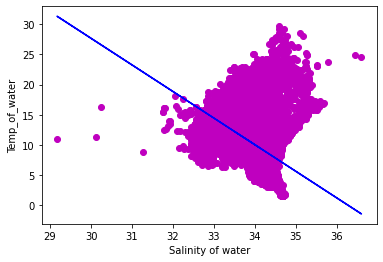

In [24]:
plt.scatter(X_test,y_test, color = "m")
plt.xlabel("Salinity of water")
plt.ylabel("Temp_of_water")
plt.plot(X_test, y_pred,color="b")
plt.show()

6. Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/

Polynomial regression is a type of regression analysis where Nth (2nd, 3rd and so forth) degree polynomials are used to model the relationship between dependent (y) and independent (x) variables. Similar to linear regression, polynomial regression uses the relationship between the variables x and y to find the best way to draw a line through the data points. When simple linear regression models fail to produce a best fit line to explain the relationship between variables, polynomial regression models can be useful in identifying the non-linear patterns of the data and describing the best fit line that may not necessarily be a straight line. In other words, Linear regression can also be thought of as 1st degree Polynomial Regression. Performance of the model tends to increase as the degree of the model increases. However, increasing the degree increases the risk of over-fitting the data. 
Polynomial Regression relies on Polynomial features that are created by raising existing features to an exponent or degree or adding new features that represent interaction between existing features (e.g. multiplication of two features) which are types of feature engineering. 

7. Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here.

In [25]:
from sklearn.linear_model import LinearRegression # import library
from sklearn.preprocessing import PolynomialFeatures

#creat the model
pol_reg = PolynomialFeatures(degree=2)
# fit the model
X_poly = pol_reg.fit_transform(X_train)
X_poly

array([[1.00000000e+00, 3.40350000e+01, 1.15838122e+03],
       [1.00000000e+00, 3.45400000e+01, 1.19301160e+03],
       [1.00000000e+00, 3.42800000e+01, 1.17511840e+03],
       ...,
       [1.00000000e+00, 3.42220000e+01, 1.17114528e+03],
       [1.00000000e+00, 3.36200000e+01, 1.13030440e+03],
       [1.00000000e+00, 3.38020000e+01, 1.14257520e+03]])

In [26]:
# The fit must be included in a multiple linear regrasion model.To do this we have to create linear regration object and this will be used to include the fit we made with the pol_reg object and our X_poly.
regression_df_pol = LinearRegression()
regression_df_pol.fit(X_poly,y_train)

LinearRegression()

In [27]:
# predicting y_pol 
y_pred_pol = regression_df_pol.predict(pol_reg.fit_transform(X_test))
y_pred_pol

array([[12.04265706],
       [ 8.1716954 ],
       [10.03042493],
       ...,
       [13.09621303],
       [10.83889542],
       [ 9.38172785]])

In [28]:
from sklearn.metrics import mean_squared_error
# mean_squared_error slightly decreased.
rms_pol = mean_squared_error(y_test, y_pred_pol)
rms_pol

13.318084986988664

In [29]:
# poly_R2 is higher then linearRegartion R2 so it means the polynomial regression fits much more well.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_pol)

0.23448994267382928

8. Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved

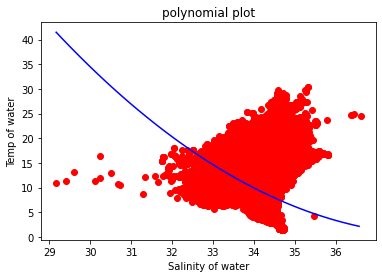

In [30]:
# creat scatter plot()
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape(len(X_grid),1) 
plt.scatter(X,y, color='red') 
 
plt.plot(X_grid, regression_df_pol.predict(pol_reg.fit_transform(X_grid)),color='blue') 
 
plt.title("polynomial plot")
plt.xlabel('Salinity of water')
plt.ylabel('Temp of water')
plt.show()

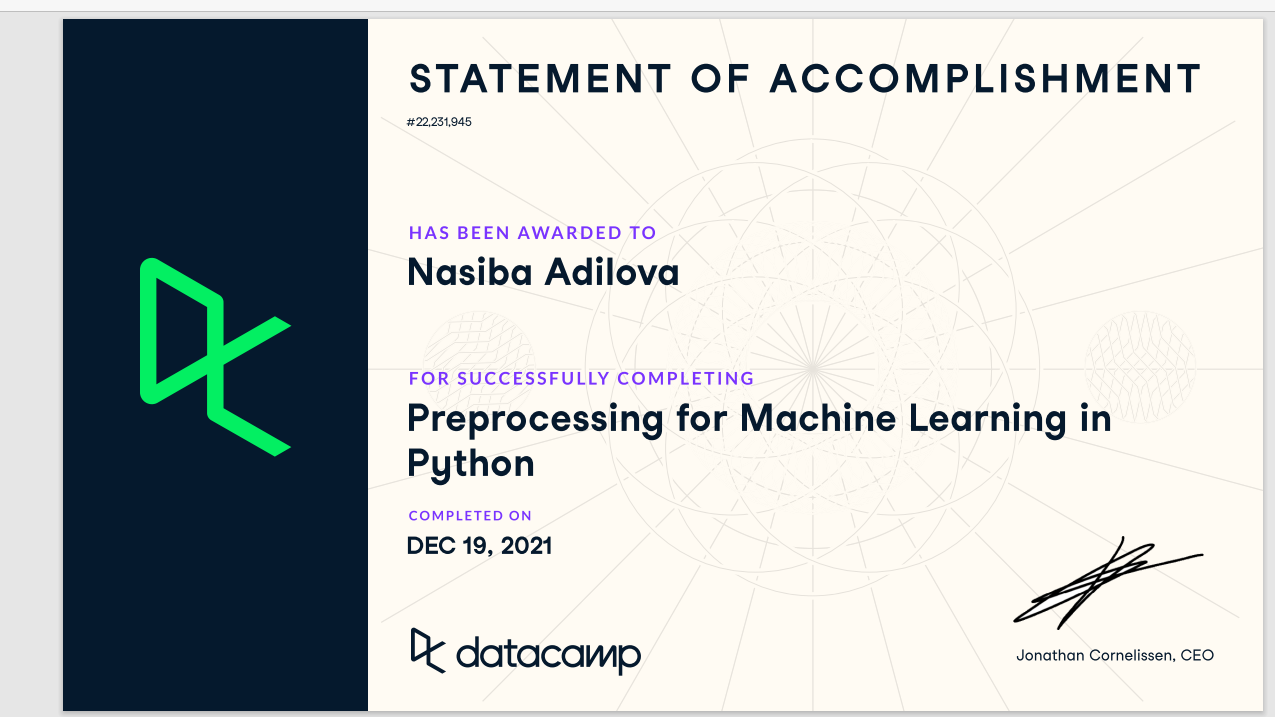